# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ".output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
city_names_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval  ")
print("---------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do the below
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_names_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")
        

Beginning Data Retrieval  
---------------------------------
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : arraial do cabo
Processing Record 3 of Set 1 : port alfred
Processing Record 4 of Set 1 : cabo san lucas
Processing Record 5 of Set 1 : karratha
Processing Record 6 of Set 1 : saint-augustin
Processing Record 7 of Set 1 : itarema
Processing Record 8 of Set 1 : ushuaia
Processing Record 9 of Set 1 : bluff
Processing Record 10 of Set 1 : gawler
Processing Record 11 of Set 1 : ribeira grande
Processing Record 12 of Set 1 : adrar
Processing Record 13 of Set 1 : ostrovnoy
City not found. Skipping...
Processing Record 14 of Set 1 : saskylakh
Processing Record 15 of Set 1 : port hardy
Processing Record 16 of Set 1 : saint-georges
Processing Record 17 of Set 1 : mataura
Processing Record 18 of Set 1 : tasiilaq
Processing Record 19 of Set 1 : egvekinot
Processing Record 20 of Set 1 : rikitea
City not found. Skipping...
Processing Record 21 of Set 1 : iqaluit
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda dataframe using retrieved data
weather_dict = pd.DataFrame({
    "City": city_names_list,
    "Cloudiness": cloudiness_list,
    "Country":country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Wind Speed": wind_speed_list
})

In [6]:
# Count data
weather_dict.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [7]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1619667740,87,-53.1500,-70.9167,39.20,16.11
1,Arraial do Cabo,98,BR,1619667740,77,-22.9661,-42.0278,71.22,5.14
2,Port Alfred,100,ZA,1619667740,86,-33.5906,26.8910,67.37,17.65
3,Cabo San Lucas,22,MX,1619667602,72,22.8909,-109.9124,71.01,10.00
4,Karratha,0,AU,1619667740,22,-20.7377,116.8463,91.69,13.40
...,...,...,...,...,...,...,...,...,...
548,Shar,97,KZ,1619667895,25,49.5886,81.0453,75.11,11.10
549,Turukhansk,100,RU,1619667895,98,65.8167,87.9833,32.13,5.30
550,Husavik,0,IS,1619667896,86,66.0449,-17.3389,26.60,3.44
551,Murray Bridge,5,AU,1619667896,40,-35.1167,139.2667,75.00,2.64


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Save city data to a csv file
# weather_dict.to_csv("../output_data/cities.csv", index = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

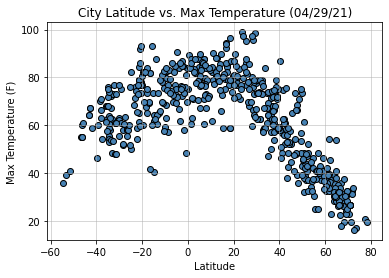

In [27]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set Title
plt.title("City Latitude vs. Max Temperature (04/29/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set gril line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Humidity Plot

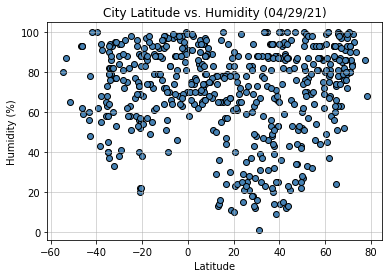

In [28]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set Title
plt.title("City Latitude vs. Humidity (04/29/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set gril line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

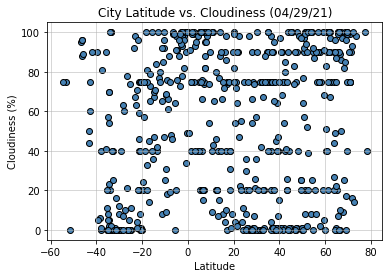

In [29]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set Title
plt.title("City Latitude vs. Cloudiness (04/29/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set gril line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

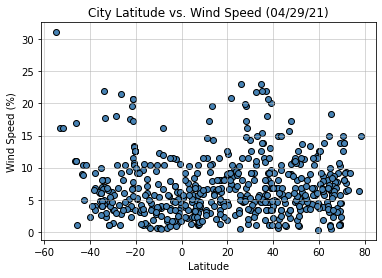

In [30]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set Title
plt.title("City Latitude vs. Wind Speed (04/29/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set gril line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Linear Regression

In [31]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [32]:
# Define linear regression and scatter plot functions
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x,y)[0], 2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
    plt.plot(x,regress_values, "r-")
    return line_eq

# Define a function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


Text(0, 0.5, 'Max Temp (F)')

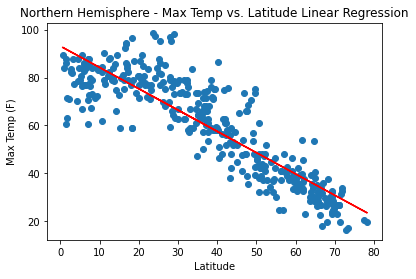

In [33]:
# Call function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
# plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Reg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.52


Text(0, 0.5, 'Max Temp (F)')

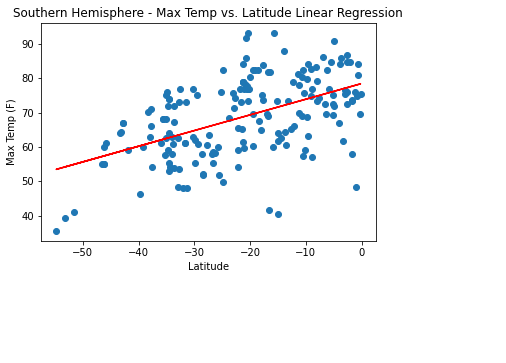

In [34]:
# Call function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.14


Text(0, 0.5, 'Humidity (%)')

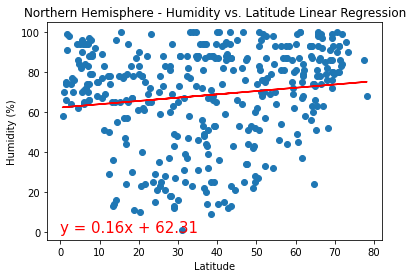

In [35]:
# Call function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
# plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Reg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.19


Text(0, 0.5, 'Humidity (%)')

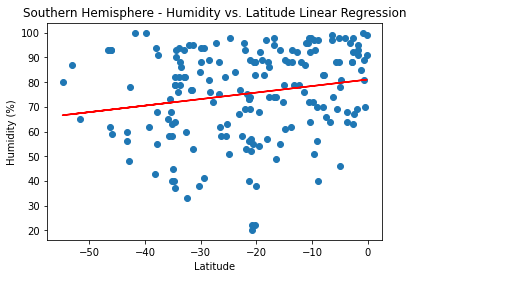

In [36]:
# Call function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
# plt.savefig("../Images/Southern Hemisphere - Humidity vs. Latitude Linear Reg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.03


Text(0, 0.5, 'Cloudiness (%)')

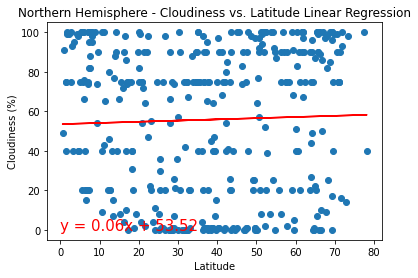

In [23]:
# Call function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
# plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Reg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.36


Text(0, 0.5, 'Cloudiness (%)')

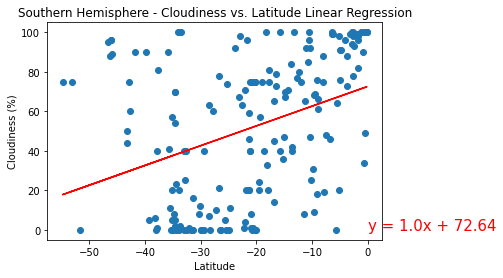

In [24]:
# Call function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
# plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Reg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.05


Text(0, 0.5, 'Wind Speed (%)')

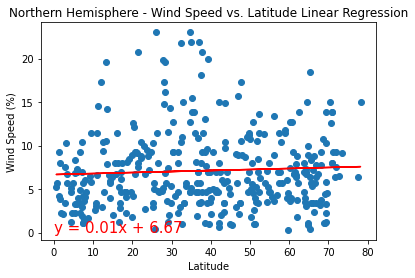

In [25]:
# Call function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (%)")

# Save the figure
# plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Reg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.27


Text(0, 0.5, 'Wind Speed (%)')

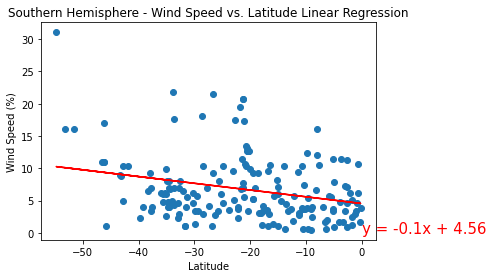

In [26]:
# Call function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (%)")

# Save the figure
# plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Reg.png")